# Example Analysis of Street Drug Data
North Carolina for July-Dec 2022

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("https://github.com/opioiddatalab/drugchecking/raw/main/datasets/nc/nc_analysis_dataset.csv")

# Convert the date_collect column to a datetime type, handling invalid dates with NaT
df['date_collect'] = pd.to_datetime(df['date_collect'], errors='coerce')

---
# How many NC samples were collected in 2022?

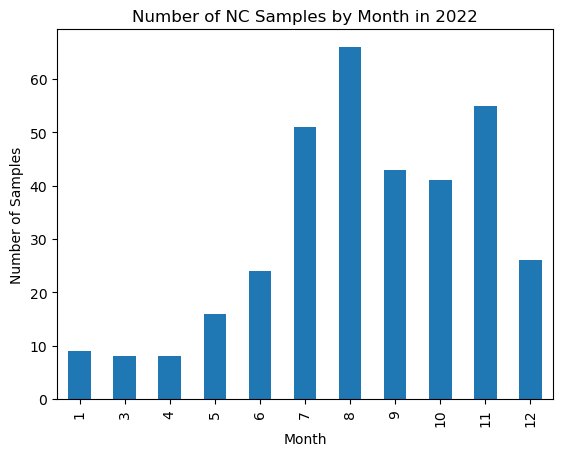

In [9]:
# Filter the data for samples collected in 2022
df = df[(df['date_collect'].dt.year == 2022)]

# Group the data by month and get the count of samples in each group
monthly_samples = df.groupby(df['date_collect'].dt.month).size()

# Plot the time series
monthly_samples.plot(kind='bar')

# Add a title and labels to the plot
plt.title("Number of NC Samples by Month in 2022")
plt.xlabel("Month")
plt.ylabel("Number of Samples")

# Show the plot
plt.show()

---
## What percent of expected-stimulant samples in Buncombe County contained any fentanyl?

In [10]:
# Filter the data for samples in Buncombe County and collected in 2022
df_avl = df[(df['county'] == 'Buncombe County') & (df['date_collect'].dt.year == 2022) & (df['expect_stimulant'] == 1)]

# Calculate the proportion of samples where lab_fentanyl_any is equal to 1
proportion = (df_avl['lab_fentanyl'] == 1).mean()

# Calculate the percentage
percentage = proportion * 100

# Print the result
print(f"{percentage:.2f}% of expected-stimulant samples (meth, coke, crack) had any trace of fentanyl, out of {df_avl.shape[0]} samples.")

13.33% of expected-stimulant samples (meth, coke, crack) had any trace of fentanyl, out of 15 samples.


---
## How often were fentanyl impurities detected in Guilford County?

In [11]:
# Filter the data for samples in Guilford County and collected in 2022
df_gso = df[(df['county'] == 'Guilford County') & (df['date_collect'].dt.year == 2022) & (df['lab_fentanyl'] == 1)]

# Calculate the proportion of samples where lab_fentanyl_any is equal to 1
proportion = (df_gso['lab_fentanyl_impurities_any'] == 1).mean()

# Calculate the percentage
percentage = proportion * 100

# Print the result
print(f"{percentage:.2f}% of fentanyl samples had fentanyl manufacturing byproducts, out of {df_gso.shape[0]} samples.")

97.06% of fentanyl samples had fentanyl manufacturing byproducts, out of 34 samples.


---
## Can participants differentiate if xylazine is present?

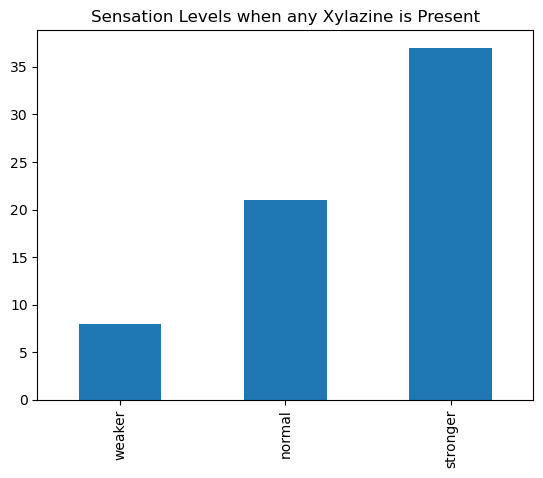

In [27]:
# Filter the dataframe to only include samples where xylazine is present at all
df_filtered = df[df['lab_xylazine_any'] == 1]

# Count the number of samples in each category of sensation_recode
sensation_counts = df_filtered['sen_strength'].value_counts()
sensation_counts = sensation_counts.sort_values(ascending=True)

# Plot the pie chart of sensation_recode
sensation_counts.plot(kind='bar', title='Sensation Levels when any Xylazine is Present')
plt.show()

<div class="alert alert-block alert-danger">
But xylazine can be present in just trace quantities, like from cross-contamination. What if we differentiate between samples where xylazine is a primary constiuent, and compare to samples where xylazine was only found at low trace levels?
</div>

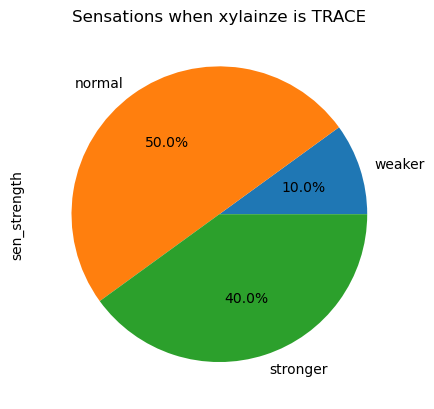

In [26]:
# Filter the dataframe to only include samples where xylazine only as trace
df_filtered = df[df['lab_xylazine_trace'] == 1]

# Count the number of samples in each category of sensation_recode
sensation_counts = df_filtered['sen_strength'].value_counts()

# Sort the counts in the desired order
sensation_counts = sensation_counts.reindex(['weaker', 'normal', 'stronger'])

# Plot the pie chart of sensation_recode
sensation_counts.plot(kind='pie', autopct='%1.1f%%', title='Sensations when xylainze is TRACE only')
plt.show()

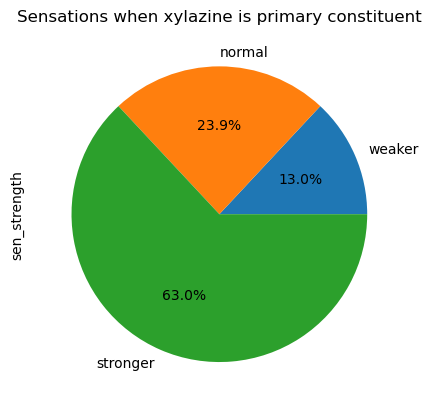

In [21]:
# Filter the dataframe to only include samples where xylazine as a primary constituent
df_filtered = df[df['lab_xylazine'] == 1]

# Count the number of samples in each category of sensation_recode
sensation_counts = df_filtered['sen_strength'].value_counts()

# Sort the counts in the desired order
sensation_counts = sensation_counts.reindex(['weaker', 'normal', 'stronger'])

# Plot the pie chart of sensation_recode
sensation_counts.plot(kind='pie', autopct='%1.1f%%', title='Sensations when xylazine is PRIMARY constituent')
plt.show()

### Interpretation

<div class="alert alert-block alert-success">
Even at trace levels, 40% felt the presence of xylazine made the dope stronger.<br>
But when xylazine was present as a priamry constiuent, the percent saying the dope was stronger jumped to 63%.
</div>






---
*fin.*